You should consider upgrading via the 'c:\users\dends\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dends\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'c:\users\dends\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


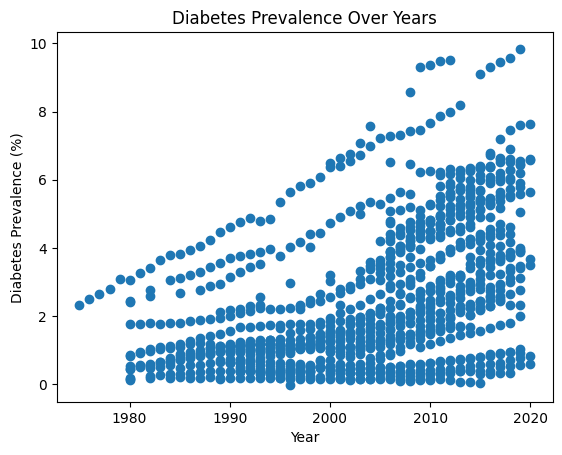

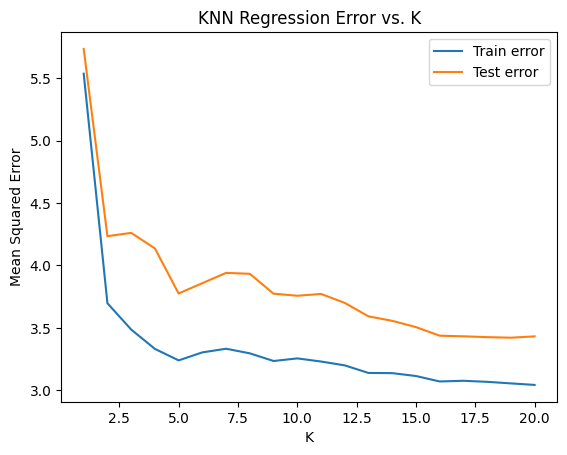

Best K: 19


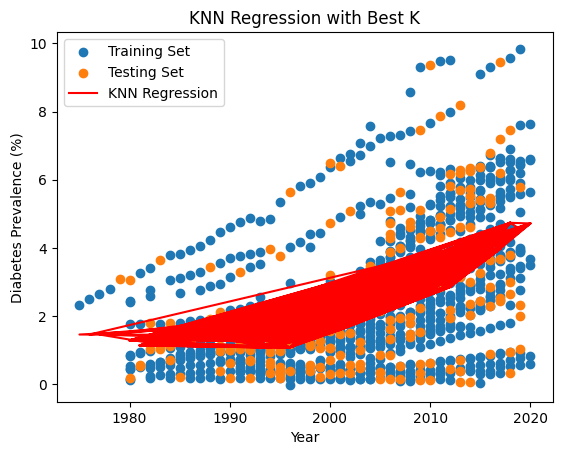

In [14]:





!pip install pytz
!pip install importlib_resources
!pip install scikit-learn

import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Завантаження даних і попередня обробка
with open("diabetes_world.csv", "r", encoding="utf-8") as file:
    reader = csv.reader(file)
    for _ in range(5):
        next(reader)
    data = list(reader)

headers = ["COUNTRY", "COUNTRY_GRP", "SEX", "YEAR", "VALUE"]
df = pd.DataFrame(data, columns=headers)
df["YEAR"] = pd.to_numeric(df["YEAR"], errors="coerce")
df["VALUE"] = pd.to_numeric(df["VALUE"], errors="coerce")
df = df.dropna(subset=["YEAR", "VALUE"])

# Візуалізація даних
plt.scatter(df['YEAR'], df['VALUE'])
plt.title('Diabetes Prevalence Over Years')
plt.xlabel('Year')
plt.ylabel('Diabetes Prevalence (%)')
plt.show()

# Розділення на тренувальний та тестовий набори
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

# Тренування моделі KNN з різними значеннями K
ks = range(1, 21)  # Перебір різних значень K
train_errors = []
test_errors = []

for k in ks:
    knn_model = KNeighborsRegressor(n_neighbors=k)
    knn_model.fit(train_data[['YEAR']], train_data['VALUE'])
    
    train_errors.append(mean_squared_error(train_data['VALUE'], knn_model.predict(train_data[['YEAR']])))
    test_errors.append(mean_squared_error(test_data['VALUE'], knn_model.predict(test_data[['YEAR']])))

# Графік залежності помилки від значення K
plt.plot(ks, train_errors, label='Train error')
plt.plot(ks, test_errors, label='Test error')
plt.xlabel('K')
plt.ylabel('Mean Squared Error')
plt.title('KNN Regression Error vs. K')
plt.legend()
plt.show()

# Вибір найкращого значення K
best_k = ks[np.argmin(test_errors)]
print(f"Best K: {best_k}")

# Побудова та візуалізація найкращої моделі KNN знайденої вище
best_knn_model = KNeighborsRegressor(n_neighbors=best_k)
best_knn_model.fit(train_data[['YEAR']], train_data['VALUE'])

plt.scatter(train_data['YEAR'], train_data['VALUE'], label='Training Set')
plt.scatter(test_data['YEAR'], test_data['VALUE'], label='Testing Set')
plt.plot(train_data['YEAR'], best_knn_model.predict(train_data[['YEAR']]), color='red', label='KNN Regression')
plt.title('KNN Regression with Best K')
plt.xlabel('Year')
plt.ylabel('Diabetes Prevalence (%)')
plt.legend()
plt.show()
